In [1]:
%load_ext nb_black
%matplotlib inline

<IPython.core.display.Javascript object>

# Required Libraries

In [2]:
# dataset preprocessing
import pandas as pd

# visualization
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

# NSL-KDD Dataset Introduction

The NSL-KDD dataset was collated in order to mitigate the problems of the KDD'99 dataset. The KDD'99 dataset attracted the attention of many researchers due to the lack of public data sets for signature based intrusion detection systems (IDSs). Tavallaee et al. [1] found that the most significant issue with the 1999 dataset is that it contained a significant number of redundant instances such that classifiers were biased towards these instances while disregarding infrequent instances. However, it is often these infrequent instances that can be indicative of new devastating network intrusions.

Some of the improvements present in the NSL-KDD dataset is that all redundant instances were removed. Moreover, the number of records from each difficulty group was selected to be inversely proportional to the percentage of records in the original KDD dataset. Difficulty refers to how many of 21 classifiers were able to classify an instance correctly from the 1999 dataset. In addition, some of the instances in the original dataset contained unsystematic noise, thus these instances were discarded when constructing the improved dataset. Overall, the original KDD dataset was disproportionately distributed, thus rendering the classifiers ineffective in serving as a discriminative tool for detecting network intrusions that can be identified by signature.

The NSL-KDD dataset can be downloaded from: https://www.unb.ca/cic/datasets/nsl.html

Please note that a 20% subset of the whole dataset will be used due to the magnitude of the whole dataset (more than 120,000 instances). The 20% subset is also provided at the above link under the name 'KDDTrain+_20Percent.TXT'

# Dataset Overview

In [3]:
df = pd.read_csv("ids.csv")
print(f"Number of Instances: {df.shape[0]}")
print(f"Number of Features (including class): {df.shape[1]}")
df.head()

Number of Instances: 25192
Number of Features (including class): 42


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


<IPython.core.display.Javascript object>

In [4]:
num_of_missing_values = df.isnull().sum().sum()
print("There are %d missing values in the dataset." % (num_of_missing_values))

There are 0 missing values in the dataset.


<IPython.core.display.Javascript object>

In [5]:
data_types = df.dtypes.value_counts().to_frame().reset_index()
data_types.columns = ["Type", "Count"]
data_types

,Type,Count
0,int64,23
1,float64,15
2,object,4


<IPython.core.display.Javascript object>

In [6]:
categorical_features = df.select_dtypes(include=["object"])
categorical_features.head()

,protocol_type,service,flag,class
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,anomaly
3,tcp,http,SF,normal
4,tcp,http,SF,normal


<IPython.core.display.Javascript object>

## Feature Statistics

In [7]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<IPython.core.display.Javascript object>

The majority of the continuous features such as duration, src_bytes, and dst_bytes have very large standard deviations and ranges. Thus, these continuous features will be transformed to a feature range of [0, 1] in the preprocessing phase

## Class Distribution

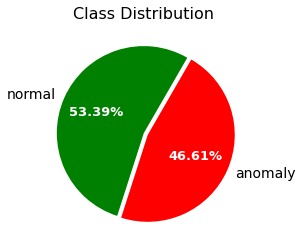

<IPython.core.display.Javascript object>

In [8]:
labels = df["class"].value_counts().index

fig, ax = plt.subplots()
_, _, autopcts = ax.pie(
    df["class"].value_counts(),
    textprops={"fontsize": 14},
    labels=labels,
    colors=("green", "red"),
    autopct="%.2f%%",
    startangle=60,
    explode=(0, 0.05),
)

plt.setp(autopcts, **{"color": "white", "weight": "bold", "fontsize": 13})
ax.set_title("Class Distribution", fontdict={"fontsize": 16})

plt.show()

Overall, the class distribution is slightly skewed towards the 'Normal' class, thus stratified cross validation (CV) will be used to ensure that the folds preserve the percentage of samples for each class. The 'Normal' class represents network traffic that is not indicative of an intrusion while the 'Anomaly' class represents network traffic that is associated with malicious behavior.

# Pre-processing

In [9]:
cols_to_drop = [col for col in list(df) if df[col].nunique() <= 1]
df = df.drop(columns=cols_to_drop)

<IPython.core.display.Javascript object>

All features with only 1 unique value are dropped since they are futile for a classification task. The only 2 features that have 1 unique value are 'num_outbound_cmds' and 'is_host_login'.

In [10]:
X = df.iloc[:, :-1]
y = df["class"]

<IPython.core.display.Javascript object>

The data is separated into two components. X contains the features of the dataset while y contains the class labels for each instance.

In [11]:
binary_features = df.columns[df.isin([0, 1]).all()].tolist()
binary_features

['land', 'urgent', 'logged_in', 'root_shell', 'num_shells', 'is_guest_login']

<IPython.core.display.Javascript object>

All the binary features do not need to be scaled to a feature range of [0, 1], thus the feature names are extracted from the dataframe.

In [12]:
numeric_features_nb = df.select_dtypes("number").columns.drop(binary_features).tolist()

<IPython.core.display.Javascript object>

All the numeric features that are non-binary, i.e., continuous, will be scaled to a feature range of [0, 1] using MinMaxScaler().